## 1. Problem

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

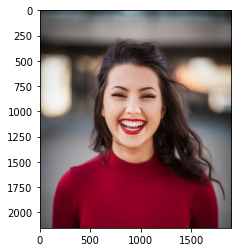

In [9]:
plt.imshow(image_origin);

### 1.1 Cùng là 1 ảnh và cùng độ sáng

In [4]:
a = 1
b = 0
image_tranform = image_origin * a + b

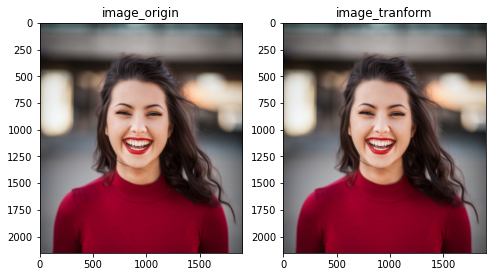

In [5]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [6]:
# Absolute Difference
np.abs(image_origin - image_tranform).sum()

0.0

### 1.2 Cùng là 1 ảnh nhưng khác độ sáng

In [10]:
a = 0.2
b = 0.01
image_tranform = image_origin * a + b

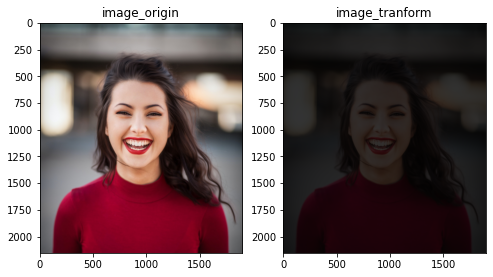

In [11]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [12]:
# Absolute Difference
np.abs(image_origin - image_tranform).sum()

3672323.1584313693

In [13]:
# MSE Difference
((image_origin - image_tranform)**2).sum()

1597646.1658674327

### 1.3 Khối lượng tính toán lớn

- Bạn hãy tưởng tượng 1 bức ảnh 500x500x3 = 750000 giá trị
- Database có 10000 bức ảnh 500x500x3 như vậy = 10000 * 750000 = 7.500.000.000 giá trị

đem 1 bức ảnh similarity cho cả database là điều không khả quan

### 1.4 Chưa được bảo mật

1 bức ảnh similarity cho cả database hết sức nguy hiểm, vì đụng trực tiếp vào database

...

## 2. Problem Solving

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

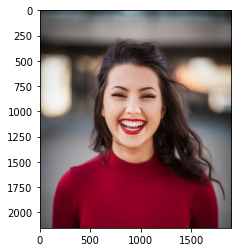

In [16]:
plt.imshow(image_origin);

### 2.1 Triệt tiêu sai khác độ sáng (ax + b)

* Triệt tiêu a -> Cosine Similarity

In [17]:
a = 0.5
b = 0
image_tranform = image_origin * a + b

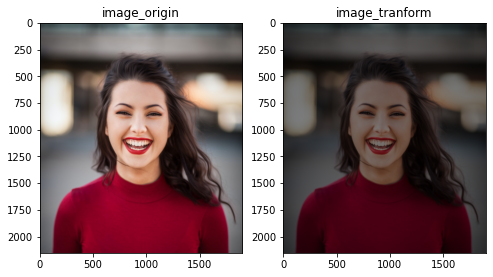

In [18]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [19]:
# Absolute Difference => nope
(image_origin - image_tranform).sum()

2362798.9921568627

In [20]:
def norm2(x, axis=None):
    return np.sqrt(np.sum(x**2, axis=axis, keepdims=True))

In [21]:
# Ứng dụng norm 2
image_origin_norm = image_origin / norm2(image_origin, axis=(0,1))
image_tranform_norm = image_tranform / norm2(image_tranform, axis=(0,1))

In [23]:
np.abs(image_origin_norm - image_tranform_norm).sum()

0.0

* Triệt tiêu b

In [24]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

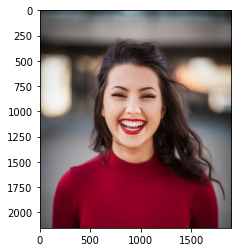

In [25]:
plt.imshow(image_origin);

In [26]:
a = 1
b = 0.05
image_tranform = image_origin * a + b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


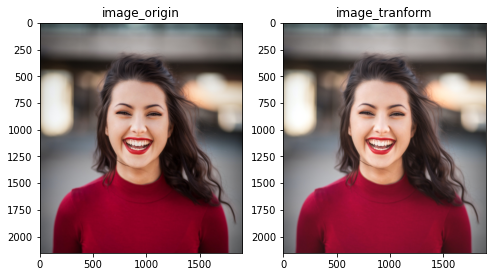

In [27]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [28]:
# Absolute Difference => nope
(image_origin - image_tranform).sum()

-613604.9999999827

In [29]:
# Ứng dụng mean
image_origin_mean = image_origin - np.mean(image_origin, axis=(0,1))
image_tranform_mean = image_tranform - np.mean(image_tranform, axis=(0,1))

In [30]:
#MSE
((image_origin_mean - image_tranform_mean)**2).sum()

2.3127362672000937e-15

* Triệt tiêu cả a và b -> Correlation Coefficient 

In [31]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

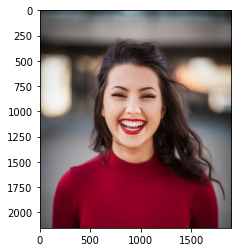

In [32]:
plt.imshow(image_origin);

In [33]:
a = 0.2
b = 0.1
image_tranform = image_origin * a + b

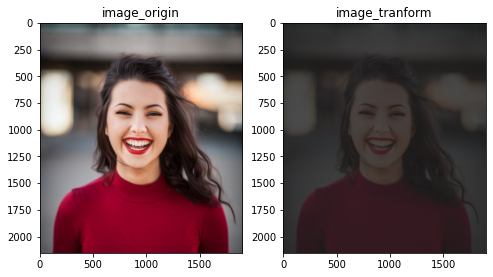

In [34]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [36]:
# Absolute Difference => nope
np.abs(image_origin - image_tranform).sum()

2843257.956862748

In [37]:
# Ứng dụng mean
image_origin_mean = image_origin - np.mean(image_origin, axis=(0,1))
image_tranform_mean = image_tranform - np.mean(image_tranform, axis=(0,1))

In [38]:
# Ứng dụng norm 2
image_origin_mean_norm = image_origin_mean / norm2(image_origin_mean, axis=(0,1))
image_tranform_mean_norm = image_tranform_mean / norm2(image_tranform_mean, axis=(0,1))

In [39]:
#MSE
((image_origin_mean_norm - image_tranform_mean_norm)**2).sum()

1.9210943687123657e-21

### 2.2 Khối lượng tính toán lớn

* Giảm chiều của ảnh

* Phân cụm (Kmean, split database)

### 2.3 Chưa được bảo mật

* Dùng fearture extractor (mask database) để similarity